In [1]:
#!usr/bin/python3 

import pandas as pd
import json
import matplotlib.pyplot as plt
from iso639 import languages

In [2]:
tweets_data_path = 'New-tweet_extract.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

print ("Total Data Samples Present -", len(tweets_data))

Total Data Samples Present - 10000


In [3]:
print("Keys availble on the data - ", tweets_data[0].keys())

Keys availble on the data -  dict_keys(['created_at', 'favorite_count', 'in_reply_to_status_id', 'place', 'reply_count', 'lang', 'in_reply_to_screen_name', 'entities', 'in_reply_to_user_id_str', 'user', 'timestamp_ms', 'contributors', 'filter_level', 'retweet_count', 'in_reply_to_user_id', 'retweeted', 'favorited', 'is_quote_status', 'retweeted_status', 'id_str', 'geo', 'id', 'coordinates', 'text', 'truncated', 'in_reply_to_status_id_str', 'source', 'quote_count'])


In [4]:
'''# Build DataFrame of tweet texts and languages
tweets = pd.DataFrame(tweets_data, columns=["text","lang","country", "user"])

# Print head of DataFrame
print(tweets.head())'''


'# Build DataFrame of tweet texts and languages\ntweets = pd.DataFrame(tweets_data, columns=["text","lang","country", "user"])\n\n# Print head of DataFrame\nprint(tweets.head())'

In [12]:
tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets["user"] = list(map(lambda tweet: str(tweet['user']), tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))
print(tweets.head())
tweets_by_lang = tweets['lang'].value_counts()

print (tweets_by_lang.head())

                                                text lang  \
0  RT @FrustIndian: Day 1: I will take Modi down,...   en   
1  RT @Pawankhera: For the people of India, every...   en   
2  RT @alok_bhatt: What will Modi do in this chao...   en   
3  RT @j_kalyanaraman: All these crooks and scams...   en   
4  RT @rangakidambee: I applaud @MALAVIKAAVINASH ...   en   

                                                user country  
0  {'created_at': 'Fri Aug 01 07:42:56 +0000 2014...    None  
1  {'created_at': 'Mon Aug 11 10:46:55 +0000 2014...    None  
2  {'created_at': 'Mon Jan 18 11:57:14 +0000 2010...    None  
3  {'created_at': 'Thu Nov 05 15:31:20 +0000 2009...    None  
4  {'created_at': 'Mon Jan 12 09:40:32 +0000 2009...    None  
en     7940
hi     1264
in      205
und     180
it       97
Name: lang, dtype: int64


In [6]:
cont = tweets.country.tolist()
from collections import Counter
print(Counter([i for i in cont if i != None]))

Counter({'India': 114, 'United Kingdom': 5, 'France': 2, 'United States': 2, 'भारत': 2, '': 1, 'Sri Lanka': 1, 'Türkiye': 1, 'Australia': 1, 'Belgio': 1, 'Singapore': 1})


India             114
United Kingdom      5
United States       2
France              2
भारत                2
Name: country, dtype: int64


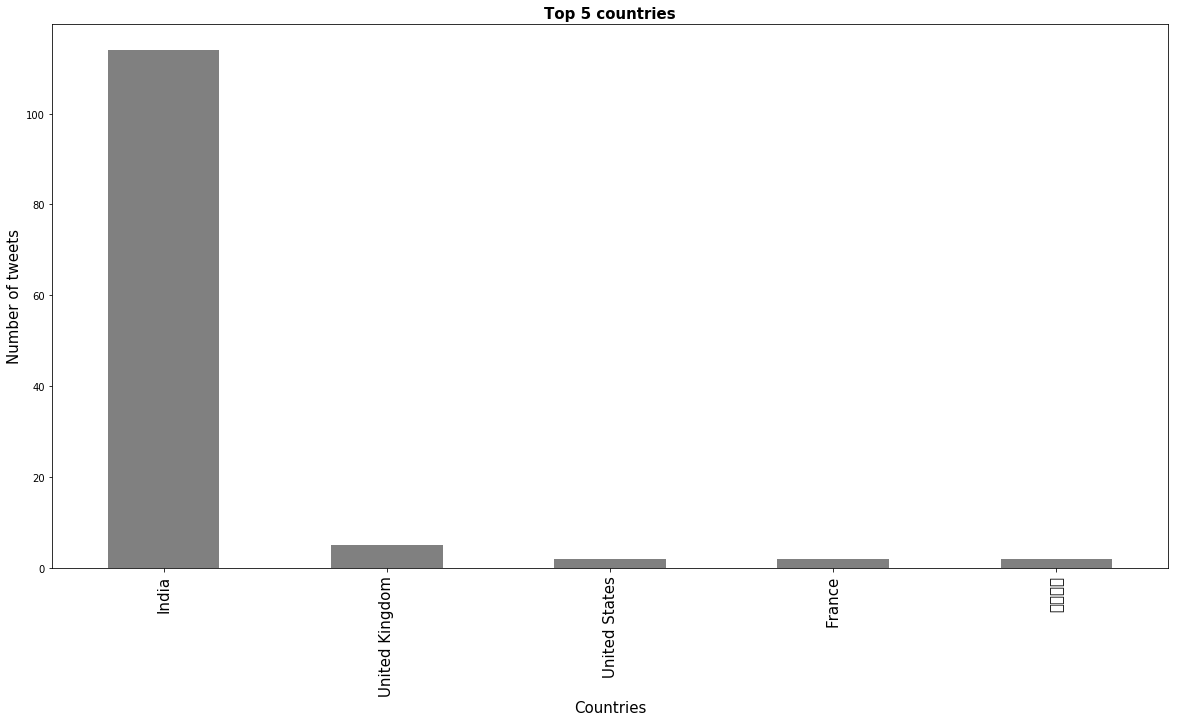

In [7]:
tweets_by_country = tweets['country'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='grey', figsize=(20,10))
print(tweets_by_country[:5])
plt.show()

English    7940
Hindi      1264
in          205
und         180
Italian      97
Name: lang_name, dtype: int64


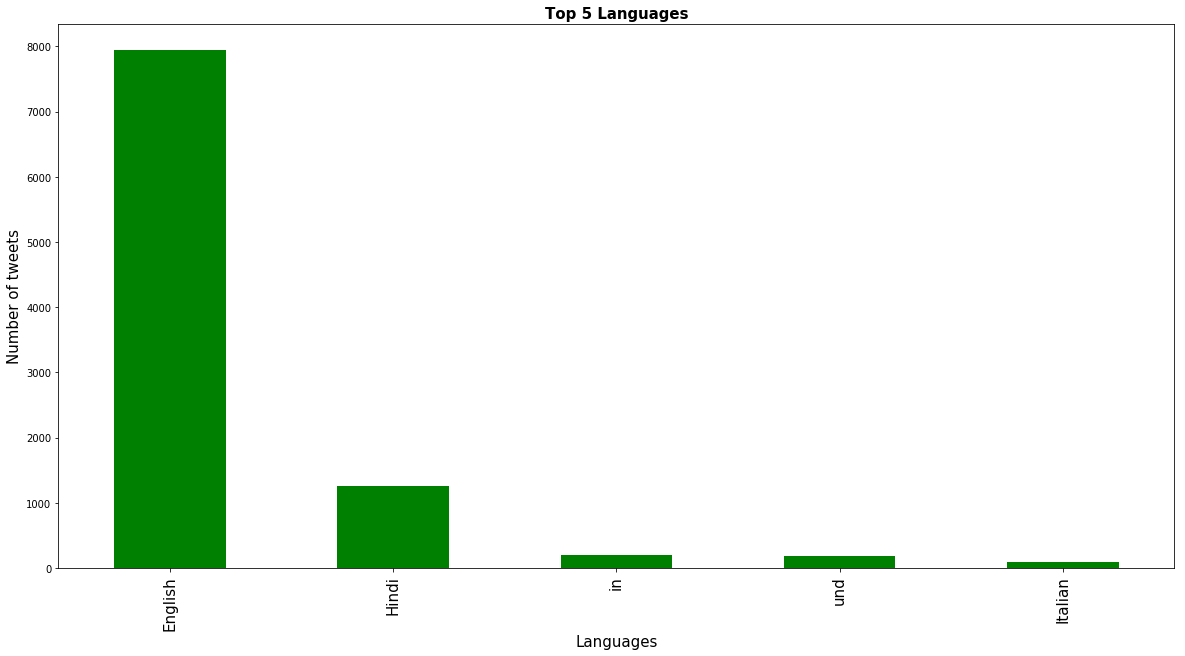

In [8]:
def lang_code_to_name(code):
    try:
        argm = languages.get(alpha2=code)
        return argm.name
    except:
        return code
    
tweets_by_language = pd.DataFrame()
tweets_by_language["lang_name"] = tweets.lang.apply(lang_code_to_name)
t_b_l_5 = tweets_by_language["lang_name"].value_counts()[:5]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 Languages', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='green', figsize=(20,10))
print(t_b_l_5[:5])
plt.show()

2017    1882
2010    1013
2018    1013
2016     969
2009     950
Name: year, dtype: int64


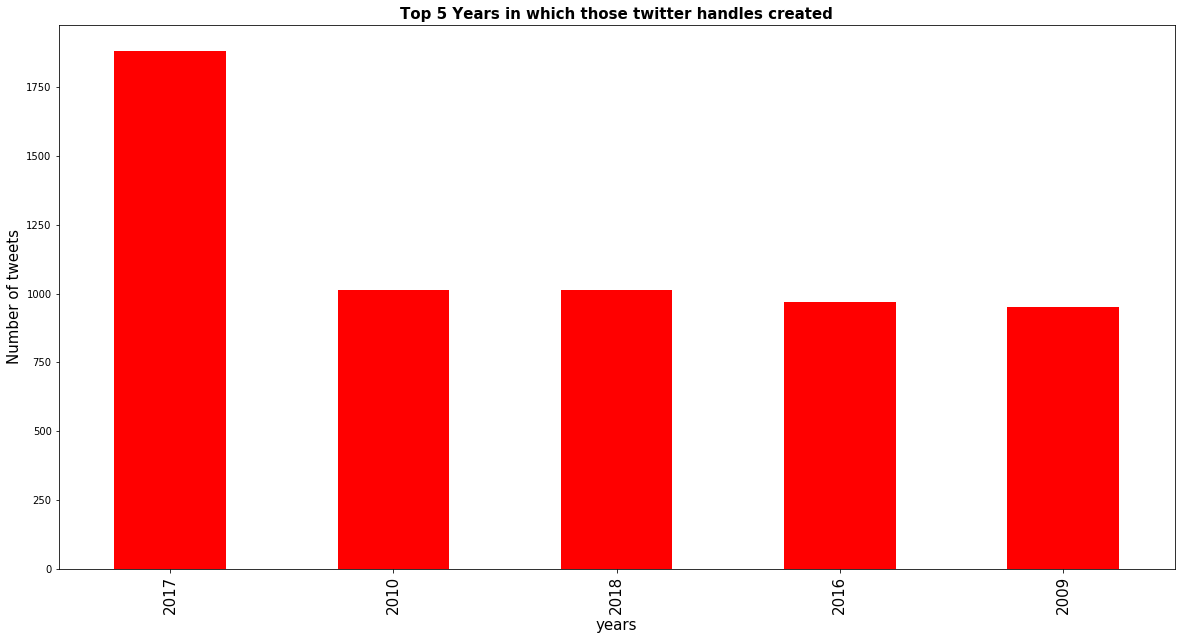

In [32]:
def handle_created_year(string):
    try:
        res = eval(string)["created_at"]
        return str(res.split()[-1])
    except:
        return "Year Unavailable"
    
handles_by_year = pd.DataFrame()
tweets_by_language["year"] = tweets.user.apply(handle_created_year)
t_b_l_5 = tweets_by_language["year"].value_counts()[:5]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('years', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 Years in which those twitter handles created', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='red', figsize=(20,10))
print(t_b_l_5[:5])
plt.show()

INDIA                   3260
Location Unavailable    3054
DELHI                    265
भारत                     198
MUMBAI                   186
BANGALORE                115
HYDERABAD                 75
USA                       52
CHENNAI                   51
BHARAT                    48
Name: location, dtype: int64


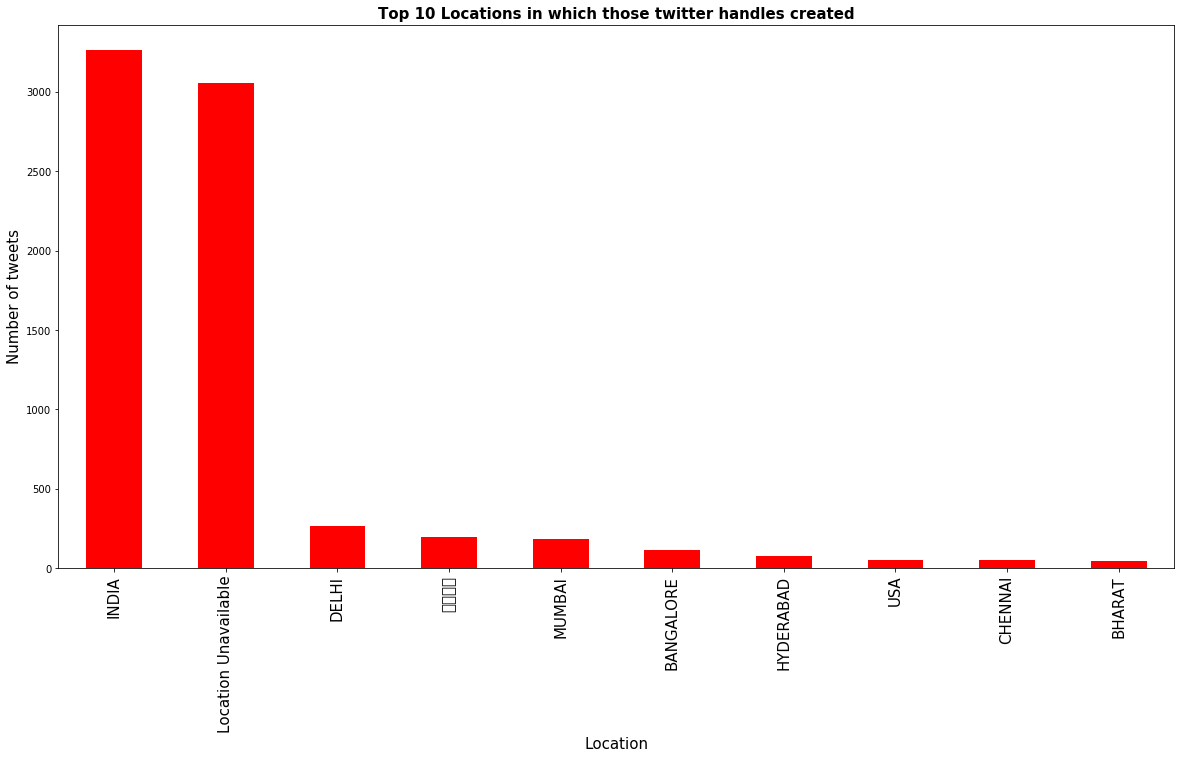

In [55]:
def handle_location_used(string):
    try:
        res = eval(string)["location"]
        return str(res.split()[-1]).upper()
    except:
        return "Location Unavailable"
    
handles_by_location = pd.DataFrame()
handles_by_location["location"] = tweets.user.apply(handle_location_used)
t_b_l_5 = handles_by_location["location"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Location', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Locations in which those twitter handles created', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='red', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()

No Profile Image Available                                                    929
http://pbs.twimg.com/profile_images/914831539044720643/6gMFE7hj_normal.jpg     39
http://pbs.twimg.com/profile_images/975343255863914496/tCf4_Z1O_normal.jpg     24
http://pbs.twimg.com/profile_images/594397994314649600/oqabiBzL_normal.jpg     23
http://pbs.twimg.com/profile_images/945625468161572864/94Lz9AJc_normal.jpg     23
http://pbs.twimg.com/profile_images/951885952284164096/ZCyEqqOP_normal.jpg     22
http://pbs.twimg.com/profile_images/976836035710783492/XH0YrfEs_normal.jpg     19
http://pbs.twimg.com/profile_images/961597130799394816/gPThCbc-_normal.jpg     18
http://pbs.twimg.com/profile_images/973978087389048833/QSNjI5e3_normal.jpg     18
http://pbs.twimg.com/profile_images/958758758926098432/NRvbhnPw_normal.jpg     16
Name: image_availability, dtype: int64


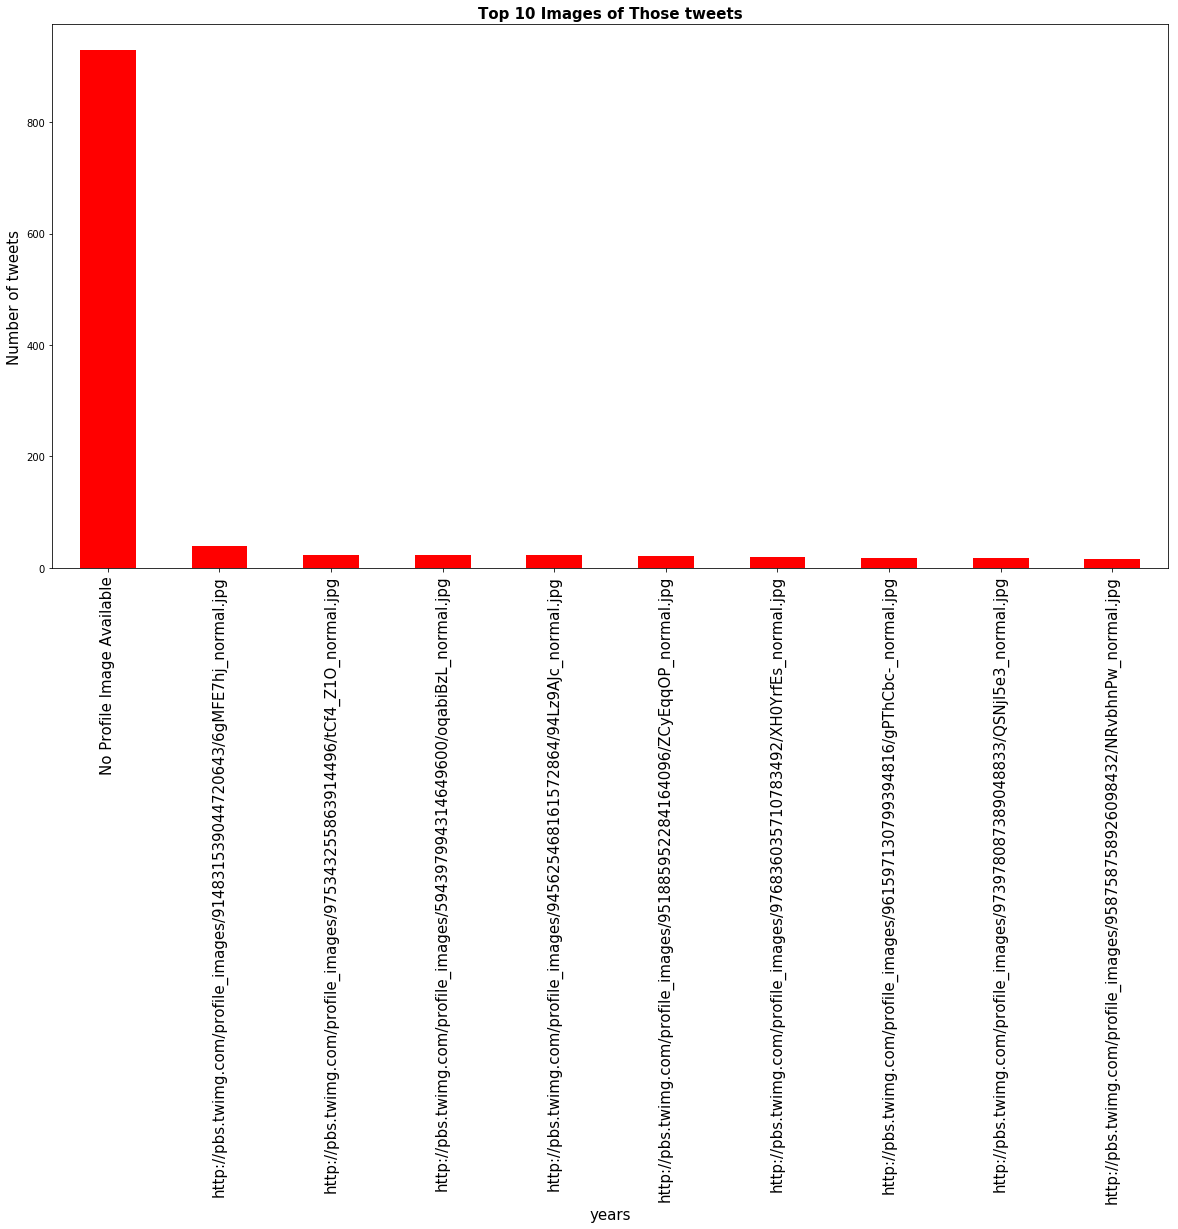

In [56]:
def handle_has_image(string):
    try:
        res = eval(string)["profile_image_url"]
        if "default_profile_normal.png" not in res:
            return res
        else:
            return "No Profile Image Available"
    except:
        return "No Profile Image Available"
    
handles_image_availability = pd.DataFrame()
handles_image_availability["image_availability"] = tweets.user.apply(handle_has_image)
t_b_l_5 = handles_image_availability["image_availability"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('years', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Images of Those tweets', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='red', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()

@KhnRais            39
@KoilpitchaiE       34
@mayursejpal        24
@IYCJammuKashmir    23
@ScamBusterIN       23
@PMNamo_            22
@tanveer1729        19
@LoveYouRamaa       18
@prithvimufc        18
@muraliks_11        16
Name: screen_name, dtype: int64


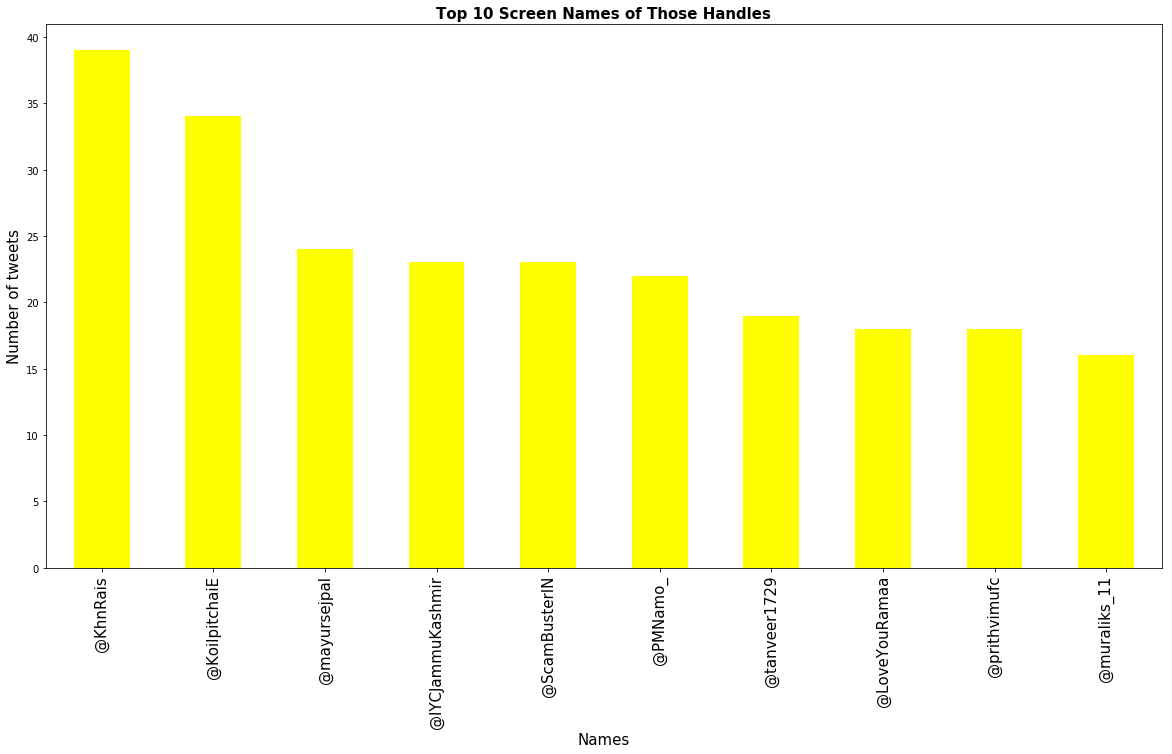

In [53]:
def handle_name(string):
    try:
        res = eval(string)["screen_name"]
        return "@"+res
    except:
        return None
    
handles_names = pd.DataFrame()
handles_names["screen_name"] = tweets.user.apply(handle_name)
t_b_l_5 = handles_names["screen_name"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Names', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Screen Names of Those Handles', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='yellow', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()

Mensi                  39
Koilpitchai Eliazer    34
Mayur Sejpal           24
J&K Youth Congress     23
The Scam Buster 🇮🇳✋    23
Narendra Modi          23
🐯Tanveer Ahmed🐯        19
Faisal Javid           18
Prithvi                18
Murli                  16
Name: image_availability, dtype: int64


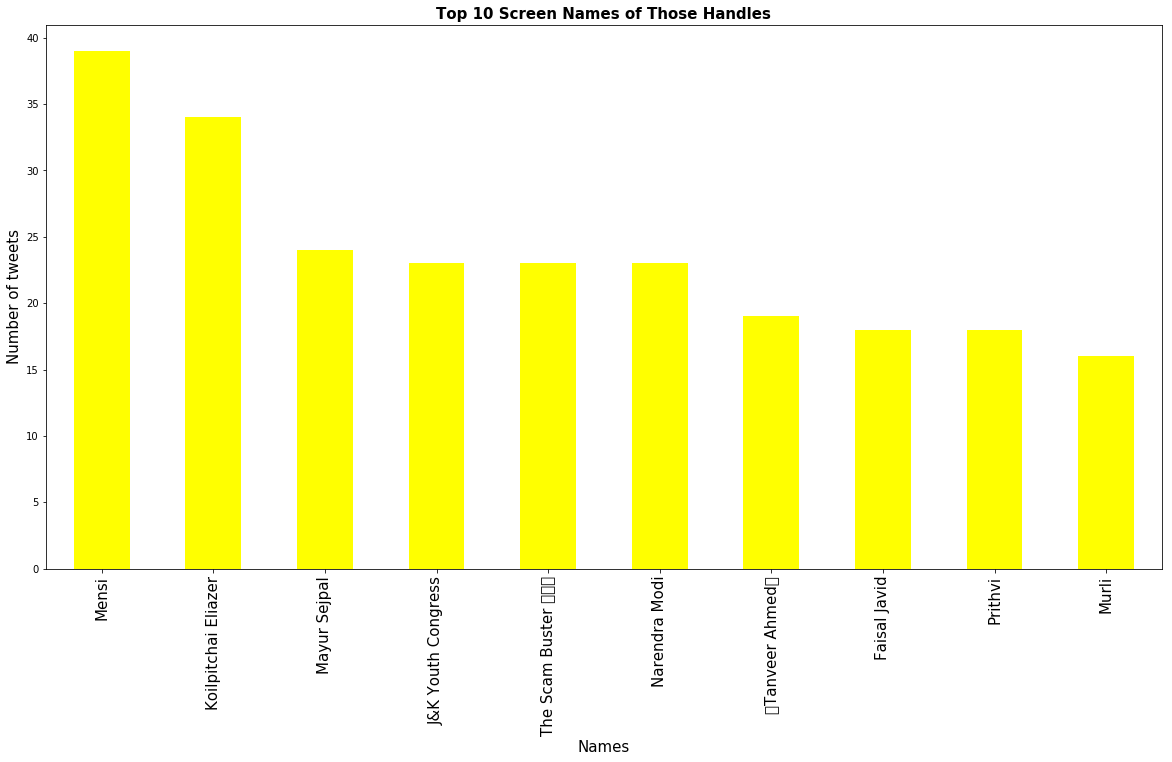

In [48]:
def handle_full_name(string):
    try:
        res = eval(string)["name"]
        return res
    except:
        return None
    
handles_image_availability = pd.DataFrame()
tweets_by_language["image_availability"] = tweets.user.apply(handle_screen_name)
t_b_l_5 = tweets_by_language["image_availability"].value_counts()[:10]
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Names', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Screen Names of Those Handles', fontsize=15, fontweight='bold')
t_b_l_5.plot(ax=ax, kind='bar', color='yellow', figsize=(20,10))
print(t_b_l_5[:10])
plt.show()